### Task 1

Use tweepy and the twitter search terms “Clinton” and “Trump” and the respective states (or the geolocation search option) to provide the required output.

In [1]:
import twitter
import tweepy
import textblob

In [2]:
def getAuthData():
    import csv
    with open('/Users/apple1/Desktop/GWU/Programming/Lectures/Week7/authdata.csv', 'r') as f:
        reader = csv.reader(f)
        your_list = list(reader)

    authdata = {}   
    for element in your_list:
        authdata[element[0]] = element[1]
    print(authdata)

    return authdata

def remove_punctuation(s):
    #to remove the punctuations in the twitter#
    punctuation = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
    s_sans_punct = ""
    for letter in s:
        if (letter not in punctuation) and (letter in "abcdefghijklmnopqrstuvwxyz "):
            s_sans_punct += letter
    return s_sans_punct

def getLowerCaseText(status_texts):
    #transfer all the twitter text into lowercase#
    lowered_texts = []
    for texts in status_texts:
        try: 
            mytext = str(texts.lower())
            lowered_texts.append(mytext)
        except:
            pass
    return lowered_texts

def remove_stopwords(lowered_text):
    #remove the stopwords in the twitter, u can define the stopwords list by yourself#
    #self define stopword list
    stopword=['and','the','to','of','her','it','in','you','she','for','rt','via']
    #stop = stopwords.words('english') + ['rt', 'via']
    good_words=[]
    good_text= [text for text in lowered_text if text not in stopword]
    good_words.append(good_text)
    #print(good_words)
    return good_words

def getCleanedTweets(lowered_texts):
    cleanedTweets = []
    for text in lowered_texts:
        wordlist = str(text).split()
        wordlist_nopun = [ str(remove_punctuation(for_a_word)) for for_a_word in wordlist ]
        cleanedTweets.append(wordlist_nopun)
    return cleanedTweets

def getScore(fileName):
    with open("/Users/apple1/Desktop/GWU/Programming/Assignments/assign4/"+fileName,'r') as f:
        tweetTexts = f.readlines()
    lowered_texts = getLowerCaseText(tweetTexts)
    lowered_texts = remove_stopwords(lowered_texts)
    cleanedTweets = getCleanedTweets(lowered_texts)
    sentimentList = GetSentimentScores(cleanedTweets)
    score = sum(sentimentList)/len(sentimentList)*50+50
    return(score)

def GetSentimentScores(cleanedTweets):
    sentiment = []
    for eachTweet in cleanedTweets:
        analysis = textblob.TextBlob(str(eachTweet))   
        sentiment.append(analysis.sentiment.polarity)
    return sentiment

In [3]:
def getTweepyData(searchTerm, fileName,geoCode):
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(OAUTH_TOKEN,OAUTH_TOKEN_SECRET)
    api = tweepy.API(auth)    
    
    tweet_cursor = tweepy.Cursor(api.search,q=searchTerm,geocode=geoCode)
    
    tweetTexts = []
    n=0
    for tweet in tweet_cursor.items():    
        if n <= 1000:
            tweetTexts.append(tweet.text) 
            n += 1
        else: 
            break
    
    with open("/Users/apple1/Desktop/GWU/Programming/Assignments/assign4/"+fileName,'a') as f:
        f.writelines(tweetTexts)

In [4]:
authdata=getAuthData()

CONSUMER_KEY = authdata['CONSUMER_KEY']
CONSUMER_SECRET = authdata['CONSUMER_SECRET']
OAUTH_TOKEN = authdata['OAUTH_TOKEN']
OAUTH_TOKEN_SECRET = authdata['OAUTH_TOKEN_SECRET']


{'CONSUMER_SECRET': 'X99oZDllVi8PTHBwzYZHtQ8XtVPajfox3LUNYqvOVP59fBK7pO', 'OAUTH_TOKEN_SECRET': 'gcfgjX7L3sc2lKvIbAuv8vP1UB8wXZ46OZh23DAGWY5k9', 'CONSUMER_KEY': 'bmePjiwBTnyOUGGWMOdGT66QU', 'OAUTH_TOKEN': '785603898312536064-veCLryQtpIqdJEi7jUJQGuQetHOld8n'}


In [5]:
#getTweepyData('Trump', "Trump_Michigan.txt",'44.31,-85.60,500mi')
#getTweepyData('Trump', "Trump_Nevada.txt",'39.13,-121.17,500mi')
#getTweepyData('Trump', "Trump_Wisconsin.txt",'43.78,-88.79,500mi')
#getTweepyData('Trump', "Trump_Ohio.txt",'40.42,-82.91,300mi')

#getTweepyData('Clinton', "Clinton_Michigan.txt",'44.31,-85.60,500mi')
#getTweepyData('Clinton', "Clinton_Nevada.txt",'39.13,-121.17,500mi')
getTweepyData('Clinton', "Clinton_Wisconsin.txt",'43.78,-88.79,500mi')
getTweepyData('Clinton', "Clinton_Ohio.txt",'40.42,-82.91,300mi')
#If u run all the eight functions at the same time, there will be error 429 due to the 15min limit.
#IT IS NOT AN ERROR OF CODE~ 
#PLZ TRY TO RUN FUNCTIONS SEPERATELY TO AVOID 15MINS LIMIT

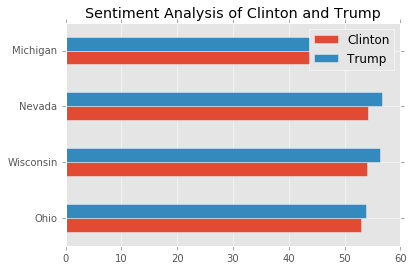

In [6]:
import csv
import pandas as pd

TM=getScore('Trump_Michigan.txt')
TN=getScore('Trump_Nevada.txt')
TW=getScore('Trump_Wisconsin.txt')
TO=getScore('Trump_Ohio.txt')

CM=getScore('Clinton_Michigan.txt')
CN=getScore('Clinton_Nevada.txt')
CW=getScore('Clinton_Wisconsin.txt')
CO=getScore('Clinton_Ohio.txt')

data = {"Trump":[TO,TW,TN,TM],"Clinton":[CO,CW,CN,CM]}
DF = pd.DataFrame(data,index=["Ohio","Wisconsin","Nevada","Michigan"])
#print(DF)

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')  

DF.plot(kind="barh")
plt.title("Sentiment Analysis of Clinton and Trump")